In [24]:
import numpy as np 
import pandas as pd 
from tensorflow.keras.layers import Dense , SimpleRNN
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt 

In [25]:
data  = pd.read_csv('../RNN/predictFinance/data/AABA_2006-01-01_to_2018-01-01.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA


In [26]:
data  = data[['Open']]


In [27]:
type(data)
X = data.values

In [28]:
X_train , X_test  = X[:2200] , X[2200:]

In [29]:
XTR , YTR = [] ,[]
for i in range(len(X_train) - 20):
    d = i+20
    XTR.append(X_train[i:d])
    YTR.append(X_train[d])

In [43]:
XTR = np.array(XTR)
XTR.shape

(2180, 1)

In [31]:
YTR = np.array(YTR)

In [32]:
Xt , Yt = [] ,[]
for i in range(len(X_test) - 20):
    d = i+20
    Xt.append(X_test[i:d])
    Yt.append(X_test[d])

In [33]:
Xt , Yt  = np.array(Xt) , np.array(Yt)

In [34]:
model  = Sequential()
model.add(SimpleRNN(64 , activation='tanh'))
model.add(Dense(1))

In [35]:
model.compile(optimizer='adam' ,loss='mean_absolute_error')

In [36]:
model.fit(XTR ,YTR , epochs=80 , batch_size = 20)

Epoch 1/80
109/109 [==============================] - 1s 5ms/step - loss: 13.9762
Epoch 2/80
109/109 [==============================] - 0s 4ms/step - loss: 6.8216
Epoch 3/80
109/109 [==============================] - 0s 4ms/step - loss: 4.3775
Epoch 4/80
109/109 [==============================] - 0s 4ms/step - loss: 2.5044
Epoch 5/80
109/109 [==============================] - 0s 5ms/step - loss: 1.5029
Epoch 6/80
109/109 [==============================] - 0s 4ms/step - loss: 1.0658
Epoch 7/80
109/109 [==============================] - 0s 4ms/step - loss: 0.8146
Epoch 8/80
109/109 [==============================] - 0s 4ms/step - loss: 0.6766
Epoch 9/80
109/109 [==============================] - 0s 4ms/step - loss: 0.5839
Epoch 10/80
109/109 [==============================] - 0s 4ms/step - loss: 0.5236
Epoch 11/80
109/109 [==============================] - 0s 4ms/step - loss: 0.4900
Epoch 12/80
109/109 [==============================] - 0s 4ms/step - loss: 0.4727
Epoch 13/80
109/109 [===

In [14]:
model.evaluate(Xt , Yt)

25/25 [==============================] - 0s 2ms/step - loss: 5.5229


5.522942543029785

In [38]:
# XTR = np.expand_dims(XTR , axis=2)
# Xt = np.expand_dims(Xt , axis=2)
# np.shape(XTR)
# np.shape(Xt)

(799, 20, 1)

In [39]:
XTR = model.predict(XTR)
Xt = model.predict(Xt)
x_final = np.concatenate([XTR , Xt] , axis=0)

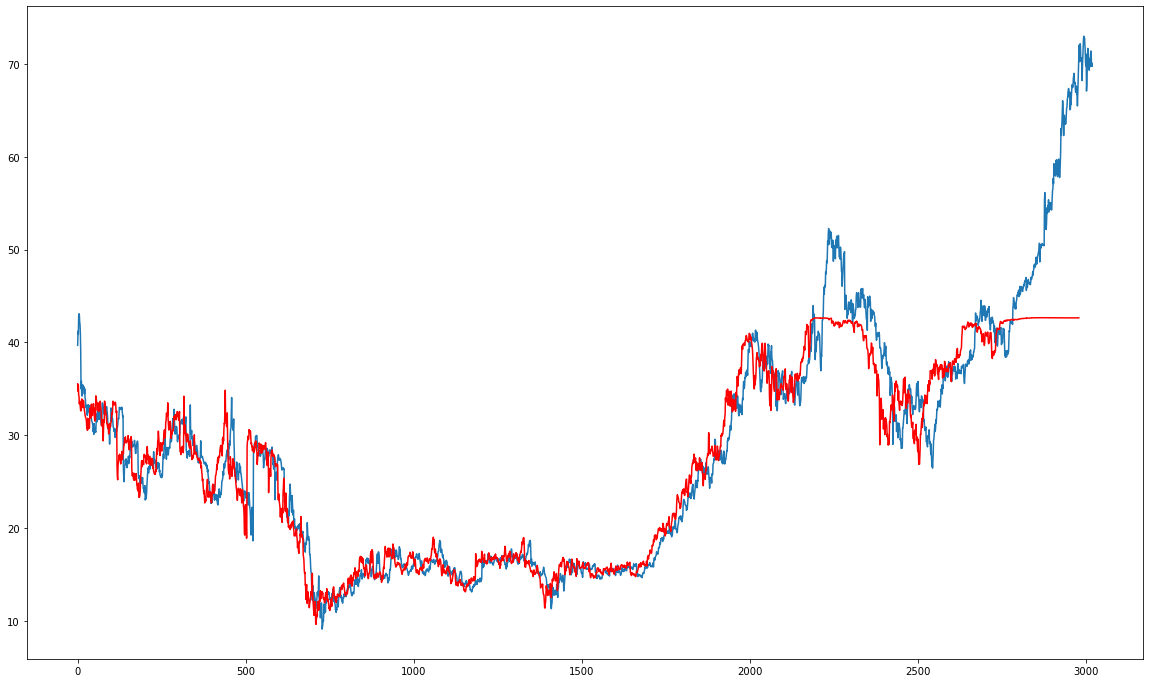

In [40]:
plt.figure(figsize=(20 , 12))
plt.plot(data)
plt.plot(x_final , c='red')